In [1]:
import uproot
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ROOT
import glob

sns.set()

Welcome to JupyROOT 6.22/06


In [2]:

# f = uproot.open('/home/newhouse/public/Analysis/HNL/DHNLAlgorithm/run/8_weight_test/submitDir_noPRW/data-tree/files.root')
event_keys = [
'runNumber',
'eventNumber',
'lumiBlock',
'coreFlags',
'bcid',
'NPV',
'actualInteractionsPerCrossing',
'averageInteractionsPerCrossing',
'weight_pileup',
'correctedAverageMu',
'correctedAndScaledAverageMu',
'correctedActualMu',
'correctedAndScaledActualMu',
'weight',
'passesHnlMuMuFilter',
'passesHnlElMuFilter',
'passesHnlElElFilter',
'passesHnlMuElFilter',
'passesVH4bFilter',
'passL1',
'passHLT',
]

In [3]:
df = uproot.open('/data/newhouse/HNL/DHNL/user.rnewhous.mc16_13TeV.311625.DAOD_SUSY15.e7660_e5984_a875_r11891_r11748_p4357.ntuple_v3p0.v1_tree.root/user.rnewhous.23870347._000001.tree.root')['outTree'].pandas.df(event_keys, flatten=False)
df.head(5)


runNumber  eventNumber  lumiBlock  coreFlags  bcid  NPV  \
entry                                                            
0         310000        40932         47          0  3402   26   
1         310000        40504         63          0  3244   25   
2         310000        40918         57          0  2449   30   
3         310000        40478         63          0  2502   28   
4         310000        40845         27          0  1454   14   

       actualInteractionsPerCrossing  averageInteractionsPerCrossing  \
entry                                                                  
0                          46.500000                       46.500000   
1                          62.500000                       62.500000   
2                          56.490002                       56.490002   
3                          62.500000                       62.500000   
4                          26.490000                       26.490000   

       weight_pileup  correctedAverageMu  ...  correctedActualMu  \
entry                                     ...                      
0           0.970388           46.500000  ...          46.500000   
1           0.192426           62.500000  ...          62.500000   
2           0.424147           56.490002  ...          56.490002   
3           0.192426           62.500000  ...          62.500000   
4           1.256309           26.490000  ...          26.490000   

       correctedAndScaledActualMu        weight  passesHnlMuMuFilter  \
entry                                                                  
0                       46.500000  1.920509e-24                False   
1                       62.500000  1.920509e-24                False   
2                       56.490002  1.920509e-24                False   
3                       62.500000  1.920509e-24                False   
4                       26.490000  1.920509e-24                False   

       passesHnlElMuFilter  passesHnlElElFilter  passesHnlMuElFilter  \
entry                                                                  
0                    False                False                False   
1                    False                False                False   
2                    False                False                False   
3                    False                False                False   
4                    False                False                False   

       passesVH4bFilter  passL1  passHLT  
entry                                     
0                 False      -1        0  
1                 False      -1        0  
2                 False      -1        0  
3                 False      -1        0  
4                 False      -1        0  

[5 rows x 21 columns]

## For MC, every one of these values is the same

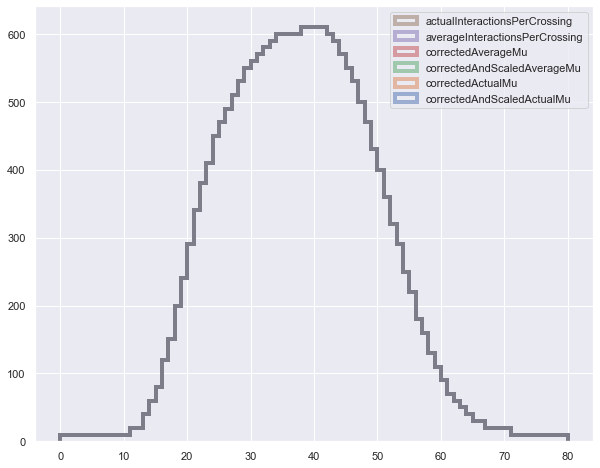

In [4]:
fig = plt.figure(figsize=[10,8])
plt.hist(df.filter(regex='.ActualMu|.AverageMu|.PerCrossing'), bins=np.linspace(0,80,81), histtype='step', linewidth=4, alpha=0.5)
plt.legend(df.filter(regex='.ActualMu|.AverageMu|.PerCrossing').columns)

## For MC, the weight_pileup is filled
Roughly centered around 1, which looks alright


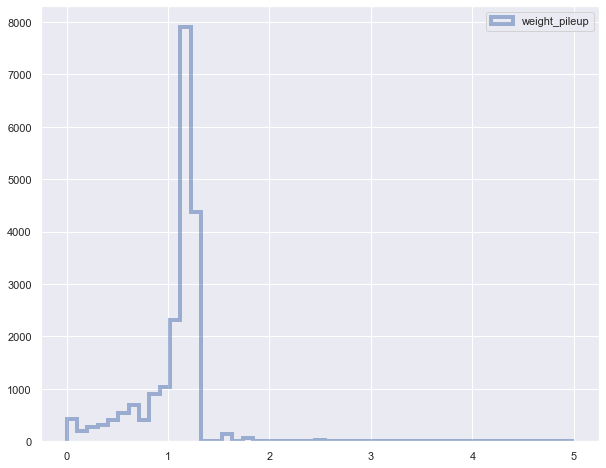

In [5]:
fig = plt.figure(figsize=[10,8])
plt.hist(df.filter(regex='weight_pileup'), bins=np.linspace(0,5,50), histtype='step', linewidth=4, alpha=0.5)
plt.legend(df.filter(regex='weight_pileup').columns)

## Substantial leftward shift by doing pileup reweighting

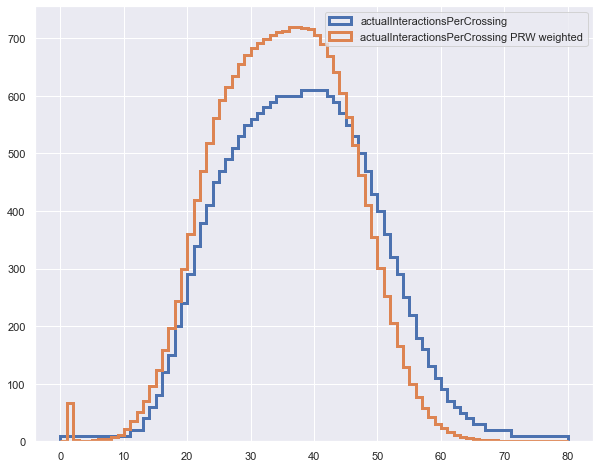

In [6]:
fig = plt.figure(figsize=[10,8])
bin_max = 80
hist_options = {
    'bins' : np.linspace(0,bin_max,bin_max+1),
    'histtype' : 'step',
    'linewidth' : 3,
    # 'density' : True
}

plt.hist(df['averageInteractionsPerCrossing'], 
         **hist_options);
plt.hist(df['averageInteractionsPerCrossing'], 
         weights=df['weight_pileup'],
         **hist_options);
plt.legend([
    'actualInteractionsPerCrossing',
    'actualInteractionsPerCrossing PRW weighted',
])


unweighted mean 38.254704
weighted mean 36.517178


## Here we make some comparisons to get a sense of what each variable means

actualInteractionsPerCrossing MC == averageInteractionsPerCrossing MC

actualInteractionsPerCrossing MC weighted == averageInteractionsPerCrossing MC weighted

actualInteractionsPerCrossing data != averageInteractionsPerCrossing data

Note, this is only a single data file and has a very specific luminosity, to get the full pcture, where there is a better match, all data must be used.

Text(0.5, 1.0, 'data18 23447292._000590')

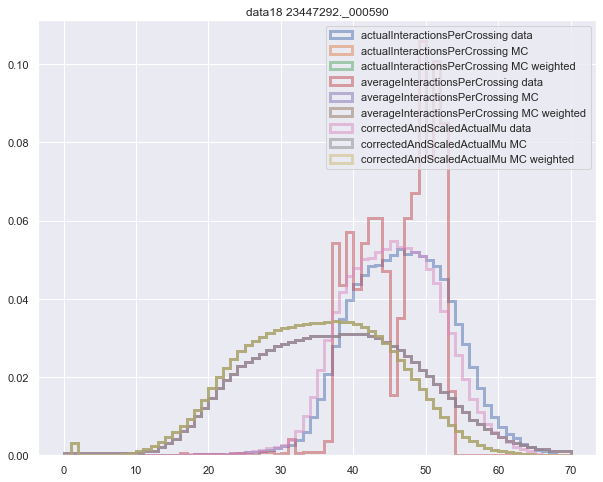

In [7]:
data_df = uproot.open('/data/hnl/v3_ntuples/data/user.rnewhous.data18_ntuple_v1_tree.root/user.rnewhous.23822336._000265.tree.root')['outTree'].pandas.df(event_keys, flatten=False)


fig = plt.figure(figsize=[10,8])

hist_options = {
    'bins' : np.linspace(0,70,71),
    'histtype' : 'step',
    'linewidth' : 3,
    'density' : True,
    'alpha': 0.5
}

plot_vars = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedAndScaledActualMu']
for var in plot_vars:
    plt.hist(data_df[var], label=var+' data',  **hist_options)
    plt.hist(df[var], label=var+' MC', **hist_options)
    plt.hist(df[var], weights=df['weight_pileup'], label=var+' MC weighted', **hist_options)
plt.legend()
plt.title('data18 23447292._000590')


## Now plotting explicitly in ROOT



### MC signal file unweighted

Error in <TH1F::Rebin>: Illegal value of ngroup=0


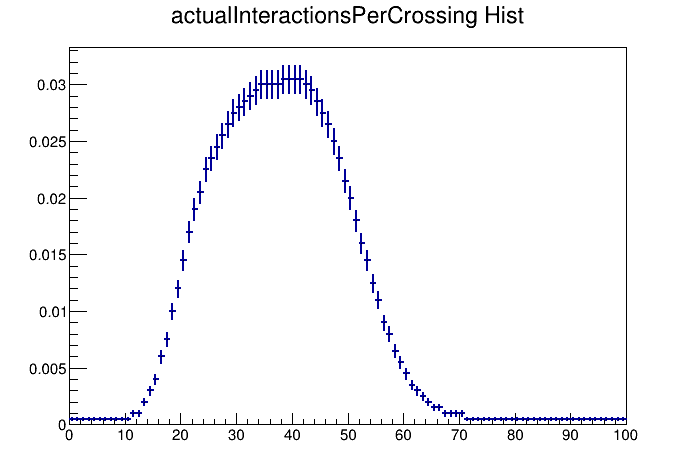

In [8]:
import ROOT

files = [ROOT.TFile('/data/newhouse/HNL/DHNL/user.rnewhous.mc16_13TeV.311625.DAOD_SUSY15.e7660_e5984_a875_r11891_r11748_p4357.ntuple_v3p0.v1_tree.root/user.rnewhous.23870347._000001.tree.root')]

all_files = [] # stupid ROOT needs to be told to not close files
all_files.append(files.copy())

c = ROOT.TCanvas()

h = ROOT.TH1F('actual_mc', 'actualInteractionsPerCrossing Hist', 100,0,100)
outTrees = [f.Get('outTree') for f in files]

# combine all histograms
for t in outTrees:
    htemp = ROOT.TH1F('htemp', 'actualInteractionsPerCrossing Hist', 100,0,100)
    t.Draw('actualInteractionsPerCrossing>>htemp', '', 'goff')
    h.Add(htemp)


h.SetLineWidth(2)
h.Scale(1/h.Integral())
h.Rebin(0)
h.Draw('same')
h.Draw('e0 same')
h.SetStats(0)

# h.SetStats(0)
c.Draw()



# h.Draw('')

### MC signal file weighted

Warning in <TFile::Append>: Replacing existing TH1: htemp (Potential memory leak).
Error in <TH1F::Rebin>: Illegal value of ngroup=0


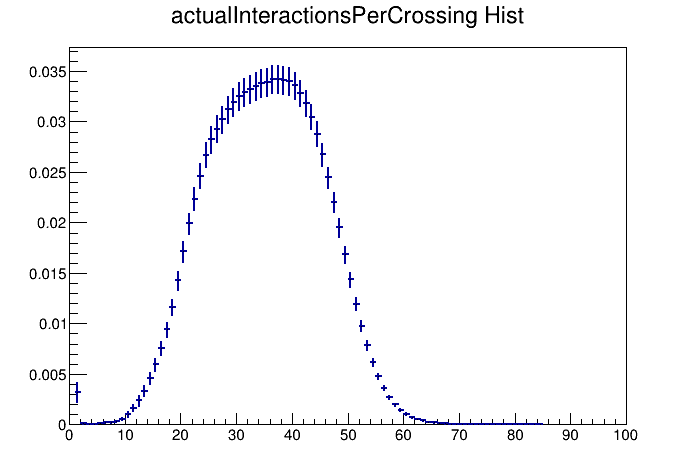

In [9]:
c = ROOT.TCanvas()

hhh = ROOT.TH1F('actual_mc_weighted', 'actualInteractionsPerCrossing Hist', 100,0,100)
outTrees = [f.Get('outTree') for f in files]

# combine all histograms
for ttt in outTrees:
    htemp = ROOT.TH1F('htemp', 'actualInteractionsPerCrossing Hist', 100,0,100)
    ttt.Draw('actualInteractionsPerCrossing>>htemp', 'weight_pileup', 'goff')
    hhh.Add(htemp)

hhh.SetLineWidth(2)
hhh.Scale(1/hhh.Integral())
hhh.Rebin(0)
hhh.Draw('same')
hhh.Draw('e0 same')
hhh.SetStats(0)

# h.SetStats(0)
c.Draw()



# h.Draw('')

In [22]:
def draw_note(x, y, text, size=25, font=63):
    l = ROOT.TLatex()
    l.SetNDC()
    l.SetTextColor(1)
    l.SetTextFont(font)
    l.SetTextSize(size)
    l.DrawLatex(x, y, text)

def atlas_label(x, y, text=None):
    draw_note(x, y, r"#bf{#it{ATLAS}} " + text)


### Draw data


Warning in <TCanvas::Constructor>: Deleting canvas with same name: pileup_c


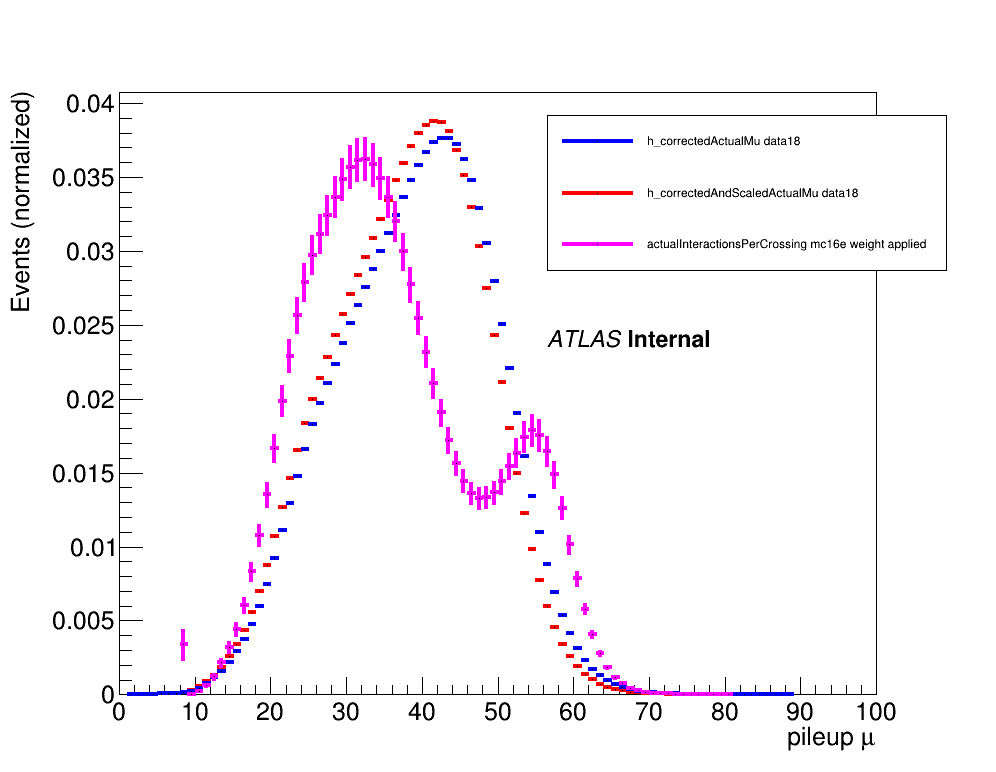

In [43]:

# set up canvas
c = ROOT.TCanvas('pileup_c', 'Pileup', 1000, 800)
c.SetMargin(0.12, 0.12, 0.1, 0.12)

mc_filename = '/data/newhouse/HNL/DHNL/user.rnewhous.mc16_13TeV.311625.DAOD_SUSY15.e7660_e5984_a875_r11891_r11748_p4357.ntuple_v3p0.v1_tree.root/user.rnewhous.23870347._000001.tree.root'
data_filename = '/home/newhouse/public/Analysis/HNL/DHNLAlgorithm/run/8_weight_test/crossings_data18.root'

mc_file = ROOT.TFile(mc_filename)
data_file = ROOT.TFile(data_filename, 'READ')

################ mc weighted ################
h = ROOT.TH1F('actual_mc_weighted', 'actualInteractionsPerCrossing Hist', 100,0,100)
outTree = mc_file.Get('outTree')
outTree.Draw('actualInteractionsPerCrossing>>actual_mc_weighted', 'weight_pileup', 'goff')

h.SetLineWidth(2)
h.Scale(1/h.Integral())
# h.Rebin(0)
h.Draw('same')
h.Draw('e0 same')
h.SetStats(0)
################ mc weighted ################


################ h_correctedAndScaledActualMu ################
# open file and get histogram (already stored)
h_correctedAndScaledActualMu = data_file.Get('h_correctedAndScaledActualMu')
h_correctedAndScaledActualMu.SetTitle('')

# set axis properties
# x
xaxis = h_correctedAndScaledActualMu.GetXaxis()
xaxis.SetRangeUser(0,100)
xaxis.SetTitle('pileup #mu')
# y
yaxis = h_correctedAndScaledActualMu.GetYaxis()
yaxis.SetTitle('Events (normalized)')
# set line properties
h_correctedAndScaledActualMu.Scale(1/h_correctedAndScaledActualMu.Integral())

# This draws data (h_correctedAndScaledActualMu)
h_correctedAndScaledActualMu.Draw('')
h_correctedAndScaledActualMu.Draw('e0 same')
h_correctedAndScaledActualMu.SetLineWidth(4)
h_correctedAndScaledActualMu.SetLineColor(ROOT.kRed)
################ h_correctedAndScaledActualMu ################ end


################ h_correctedActualMu ################
h_correctedActualMu = ff.Get('h_correctedActualMu')
h_correctedActualMu.SetTitle('')

# set axis properties
# x
xaxis = h_correctedActualMu.GetXaxis()
xaxis.SetRangeUser(0,100)
xaxis.SetTitle('pileup #mu')
# y
yaxis = h_correctedActualMu.GetYaxis()
yaxis.SetTitle('Events (normalized)')
# set line properties
h_correctedActualMu.Scale(1/h_correctedActualMu.Integral())

# This draws data (h_correctedActualMu)
# 
h_correctedActualMu.Draw('same')
h_correctedActualMu.Draw('e0 same')
h_correctedActualMu.SetLineWidth(4)
h_correctedActualMu.SetLineColor(ROOT.kBlue)
################ h_correctedAndScaledActualMu ################ end


#this draws MC from the cell above but weighted with pileup weight (h)
h.Draw('same')
h.Draw('e0 same')
h.SetLineWidth(4)
h.SetLineColor(ROOT.kMagenta)

# legend
x = 0.55
y = 0.65
dy = 0.1
leg = ROOT.TLegend(x, y, x+.4, y+.2)
leg.Draw('SAME')

leg.AddEntry(h_correctedActualMu, "h_correctedActualMu data18")
leg.AddEntry(h_correctedAndScaledActualMu, "h_correctedAndScaledActualMu data18")
# leg.AddEntry(h, "actualInteractionsPerCrossing mc16e ")
leg.AddEntry(h, "actualInteractionsPerCrossing mc16e weight applied")

h_correctedAndScaledActualMu.SetStats(0)
h.SetStats(0)
atlas_label(x,y-dy, 'Internal')


c.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: pileup_c


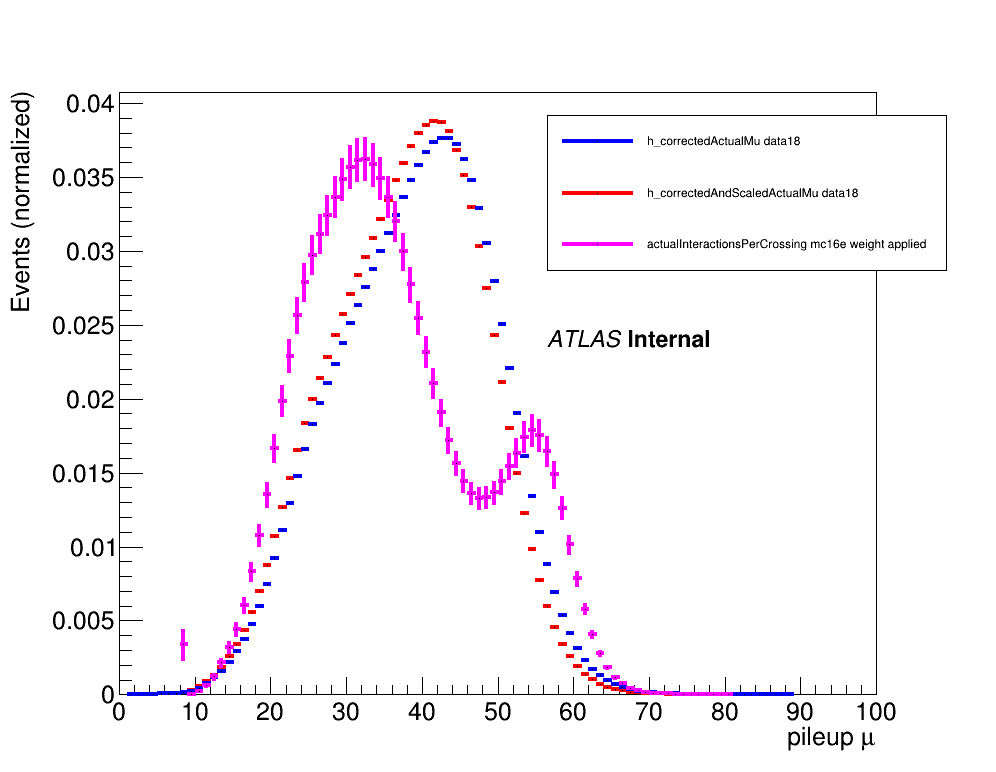

In [44]:

# set up canvas
c = ROOT.TCanvas('pileup_c', 'Pileup', 1000, 800)
c.SetMargin(0.12, 0.12, 0.1, 0.12)

mc_filename = '/data/newhouse/HNL/DHNL/user.rnewhous.mc16_13TeV.312965.DAOD_SUSY15.e7902_e5984_a875_r11916_r11748_p4357.ntuple_v3p0.v1_tree.root/user.rnewhous.23866713._000001.tree.root'
data_filename = '/home/newhouse/public/Analysis/HNL/DHNLAlgorithm/run/8_weight_test/crossings_data18.root'

mc_file = ROOT.TFile(mc_filename)
data_file = ROOT.TFile(data_filename, 'READ')
…
h_correctedAndScaledActualMu.SetStats(0)
h.SetStats(0)
atlas_label(x,y-dy, 'Internal')


c.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: pileup_c


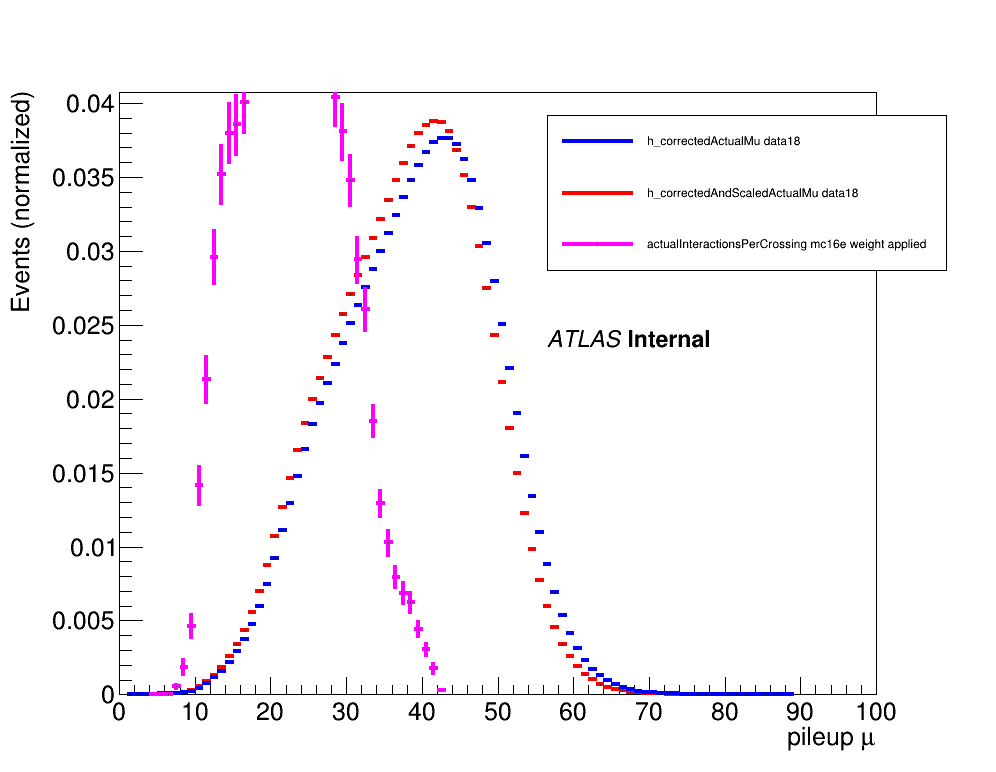

In [52]:

# set up canvas
c = ROOT.TCanvas('pileup_c', 'Pileup', 1000, 800)
c.SetMargin(0.12, 0.12, 0.1, 0.12)

mc_filename = '/data/newhouse/HNL/DHNL/user.rnewhous.mc16_13TeV.311625.DAOD_SUSY15.e7660_e5984_a875_r11915_r11748_p4357.ntuple_v3p0.v1_tree.root/user.rnewhous.23857920._000001.tree.root'
data_filename = '/home/newhouse/public/Analysis/HNL/DHNLAlgorithm/run/8_weight_test/crossings_data18.root'

mc_file = ROOT.TFile(mc_filename)
data_file = ROOT.TFile(data_filename, 'READ')

################ mc weighted ################
h = ROOT.TH1F('actual_mc_weighted', 'actualInteractionsPerCrossing Hist', 100,0,100)
outTree = mc_file.Get('outTree')
outTree.Draw('actualInteractionsPerCrossing>>actual_mc_weighted', 'weight_pileup', 'goff')

h.SetLineWidth(2)
h.Scale(1/h.Integral())
# yaxis = h.GetYaxis()
# yaxis.SetRangeUser(0,.7)


# h.Rebin(0)
h.Draw('same')
h.Draw('e0 same')
h.SetStats(0)
################ mc weighted ################


################ h_correctedAndScaledActualMu ################
# open file and get histogram (already stored)
h_correctedAndScaledActualMu = data_file.Get('h_correctedAndScaledActualMu')
h_correctedAndScaledActualMu.SetTitle('')

# set axis properties
# x
xaxis = h_correctedAndScaledActualMu.GetXaxis()
xaxis.SetRangeUser(0,100)
xaxis.SetTitle('pileup #mu')
# y
yaxis = h_correctedAndScaledActualMu.GetYaxis()
yaxis.SetTitle('Events (normalized)')
# set line properties
h_correctedAndScaledActualMu.Scale(1/h_correctedAndScaledActualMu.Integral())

# This draws data (h_correctedAndScaledActualMu)
h_correctedAndScaledActualMu.Draw('')
h_correctedAndScaledActualMu.Draw('e0 same')
h_correctedAndScaledActualMu.SetLineWidth(4)
h_correctedAndScaledActualMu.SetLineColor(ROOT.kRed)
################ h_correctedAndScaledActualMu ################ end


################ h_correctedActualMu ################
h_correctedActualMu = ff.Get('h_correctedActualMu')
h_correctedActualMu.SetTitle('')

# set axis properties
# x
xaxis = h_correctedActualMu.GetXaxis()
xaxis.SetRangeUser(0,100)
xaxis.SetTitle('pileup #mu')
# y
yaxis = h_correctedActualMu.GetYaxis()
yaxis.SetTitle('Events (normalized)')
# set line properties
h_correctedActualMu.Scale(1/h_correctedActualMu.Integral())

# This draws data (h_correctedActualMu)
# 
h_correctedActualMu.Draw('same')
h_correctedActualMu.Draw('e0 same')
h_correctedActualMu.SetLineWidth(4)
h_correctedActualMu.SetLineColor(ROOT.kBlue)
################ h_correctedAndScaledActualMu ################ end


#this draws MC from the cell above but weighted with pileup weight (h)
h.Draw('same')
h.Draw('e0 same')
h.SetLineWidth(4)
h.SetLineColor(ROOT.kMagenta)

# legend
x = 0.55
y = 0.65
dy = 0.1
leg = ROOT.TLegend(x, y, x+.4, y+.2)
leg.Draw('SAME')

leg.AddEntry(h_correctedActualMu, "h_correctedActualMu data18")
leg.AddEntry(h_correctedAndScaledActualMu, "h_correctedAndScaledActualMu data18")
# leg.AddEntry(h, "actualInteractionsPerCrossing mc16e ")
leg.AddEntry(h, "actualInteractionsPerCrossing mc16e weight applied")

h_correctedAndScaledActualMu.SetStats(0)
h.SetStats(0)
atlas_label(x,y-dy, 'Internal')


c.Draw()


In [100]:
trimmed = uproot.open('/home/newhouse/public/Analysis/HNL/DHNLAlgorithm/run/15_tracking_sys/submitDir_trimmed/data-tree/files.root')['outTree']
df_trimmed = trimmed.pandas.df(entrystop=1000, flatten=False)

normal = uproot.open('/home/newhouse/public/Analysis/HNL/DHNLAlgorithm/run/15_tracking_sys/submitDir_normal/data-tree/files.root')['outTree']
df_normal = normal.pandas.df(entrystop=1000, flatten=False)

/home/newhouse/miniconda3/lib/python3.7/site-packages/awkward/array/base.py:394: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return cls.numpy.array(value, copy=False)


In [101]:
df = df_trimmed
df['secVtx_VSI_LeptonsMod_ntrk']
secVtx_VSI_LeptonsMod_ntrk = df['secVtx_VSI_LeptonsMod_ntrk'][df['secVtx_VSI_LeptonsMod_ntrk'].apply(lambda x: True if not len(x) == 0 else False )]
secVtx_VSI_LeptonsMod_ntrk.apply(lambda x: x[0]).value_counts()
df[['secVtx_VSI_LeptonsMod_ntrk', 'secVtx_VSI_LeptonsMod_trk_electronIndex', 'secVtx_VSI_LeptonsMod_trk_pt']]


secVtx_VSI_LeptonsMod_ntrk secVtx_VSI_LeptonsMod_trk_electronIndex  \
entry                                                                      
0                             []                                      []   
1                             []                                      []   
2                             []                                      []   
3                            [2]                              [[-1, -1]]   
4                             []                                      []   
...                          ...                                     ...   
995                           []                                      []   
996                          [2]                              [[-1, -1]]   
997                           []                                      []   
998                           []                                      []   
999                           []                                      []   

      secVtx_VSI_LeptonsMod_trk_pt  
entry                               
0                               []  
1                               []  
2                               []  
3          [[7.8052864, 6.683733]]  
4                               []  
...                            ...  
995                             []  
996       [[10.715101, 13.439744]]  
997                             []  
998                             []  
999                             []  

[1000 rows x 3 columns]

In [102]:
df = df_normal
df['secVtx_VSI_LeptonsMod_ntrk']
secVtx_VSI_LeptonsMod_ntrk = df['secVtx_VSI_LeptonsMod_ntrk'][df['secVtx_VSI_LeptonsMod_ntrk'].apply(lambda x: True if not len(x) == 0 else False )]
secVtx_VSI_LeptonsMod_ntrk.apply(lambda x: x[0]).value_counts()
df[['secVtx_VSI_LeptonsMod_ntrk', 'secVtx_VSI_LeptonsMod_trk_electronIndex', 'secVtx_VSI_LeptonsMod_trk_pt']]


secVtx_VSI_LeptonsMod_ntrk secVtx_VSI_LeptonsMod_trk_electronIndex  \
entry                                                                      
0                             []                                      []   
1                             []                                      []   
2                             []                                      []   
3                            [2]                              [[-1, -1]]   
4                             []                                      []   
...                          ...                                     ...   
995                           []                                      []   
996                          [2]                              [[-1, -1]]   
997                           []                                      []   
998                           []                                      []   
999                           []                                      []   

      secVtx_VSI_LeptonsMod_trk_pt  
entry                               
0                               []  
1                               []  
2                               []  
3          [[7.8052864, 6.683733]]  
4                               []  
...                            ...  
995                             []  
996       [[10.715101, 13.439744]]  
997                             []  
998                             []  
999                             []  

[1000 rows x 3 columns]

In [106]:
df_normal['secVtx_VSI_LeptonsMod_ntrk'][df_normal['secVtx_VSI_LeptonsMod_ntrk'].apply(lambda x: True if not len(x) == 0 else False ) != df_trimmed['secVtx_VSI_LeptonsMod_ntrk'].apply(lambda x: True if not len(x) == 0 else False )]

entry
74     [2]
490    [2]
728    [2]
861    [2]
892    [2]
934    [2]
Name: secVtx_VSI_LeptonsMod_ntrk, dtype: object

In [10]:
df_normal[secVtx_VSI_LeptonsMod_ntrk]

['runNumber',
 'eventNumber',
 'lumiBlock',
 'coreFlags',
 'bcid',
 'mcEventNumber',
 'mcChannelNumber',
 'mcEventWeight',
 'NPV',
 'actualInteractionsPerCrossing',
 'averageInteractionsPerCrossing',
 'weight_pileup',
 'correctedAverageMu',
 'correctedAndScaledAverageMu',
 'correctedActualMu',
 'correctedAndScaledActualMu',
 'rand_run_nr',
 'rand_lumiblock_nr',
 'pdgId1',
 'pdgId2',
 'pdfId1',
 'pdfId2',
 'x1',
 'x2',
 'q',
 'xf1',
 'xf2',
 'weight',
 'passesHnlMuMuFilter',
 'passesHnlElMuFilter',
 'passesHnlElElFilter',
 'passesHnlMuElFilter',
 'passesVH4bFilter',
 'passL1',
 'passHLT',
 'passedTriggers',
 'disabledTriggers',
 'nmuon',
 'muon_m',
 'muon_pt',
 'muon_phi',
 'muon_eta',
 'muon_charge',
 'muon_isTrigMatched',
 'muon_isTrigMatchedToChain',
 'muon_listTrigChains',
 'muon_isTight',
 'muon_isMedium',
 'muon_isLoose',
 'muon_trkd0',
 'muon_trkd0sig',
 'muon_trkz0',
 'muon_trkz0sintheta',
 'muon_trkphi0',
 'muon_trktheta',
 'muon_trkcharge',
 'muon_trkqOverP',
 'muon_EnergyLoss